In [1]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [2]:
print('x_train.shape:',x_train.shape)
print('x_test.shape:',x_test.shape)
print('y_train.shape:',y_train.shape)
print('y_test.shape:',y_test.shape)

x_train.shape: (60000, 28, 28)
x_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


In [3]:
x_train = x_train.reshape(60000,784)
x_train = x_train/255.
x_test = x_test.reshape(10000,784)
x_test = x_test/255.

In [4]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [5]:
from keras.models import Sequential

model = Sequential()

In [6]:
from keras.layers import Dense

model.add(
    Dense(
        units=64,
        input_shape=(784,),
        activation='relu'
    )
)

C:\Users\murai\.conda\envs\training\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.add(
    Dense(
        units=10,
        activation='softmax'
    )
)

In [8]:
from keras.callbacks import TensorBoard

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
tsb=TensorBoard(log_dir='./logs')
history_adam=model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    callbacks=[tsb]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8442 - loss: 0.5522 - val_accuracy: 0.9483 - val_loss: 0.1850
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9516 - loss: 0.1740 - val_accuracy: 0.9594 - val_loss: 0.1401
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9644 - loss: 0.1249 - val_accuracy: 0.9644 - val_loss: 0.1214
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9740 - loss: 0.0923 - val_accuracy: 0.9668 - val_loss: 0.1120
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9759 - loss: 0.0784 - val_accuracy: 0.9697 - val_loss: 0.1040
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9800 - loss: 0.0657 - val_accuracy: 0.9704 - val_loss: 0.0975
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9840 - loss: 0.0529 - val_accuracy: 0.9680 - val_loss: 0.1011
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9859 - loss: 0.0461 - 

In [9]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_train = x_train / 255
x_test = x_test.reshape(10000,784)
x_test = x_test / 255
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
tsb = TensorBoard(log_dir = './logs')

In [10]:
input = Input(shape=(784,))
middle = Dense(units=64, activation='relu')(input)
output = Dense(units=10, activation='softmax')(middle)
model = Model(inputs = [input],outputs=[output])

In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2
)

Epoch 1/20


C:\Users\murai\.conda\envs\training\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_4']
Received: inputs=Tensor(shape=(32, 784))
  warnings.warn(msg)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8518 - loss: 0.5375 - val_accuracy: 0.9537 - val_loss: 0.1709
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9548 - loss: 0.1614 - val_accuracy: 0.9614 - val_loss: 0.1301
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9697 - loss: 0.1089 - val_accuracy: 0.9648 - val_loss: 0.1188
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9732 - loss: 0.0885 - val_accuracy: 0.9701 - val_loss: 0.1008
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9800 - loss: 0.0672 - val_accuracy: 0.9672 - val_loss: 0.1074
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9843 - loss: 0.0545 - val_accuracy: 0.9713 - val_loss: 0.0951
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0452 - val_accuracy: 0.9696 - val_loss: 0.1029
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0415 - val_accurac

In [24]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Accuracy
    plt.figure(figsize=(12, 10))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, acc, 'b')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    # Loss
    plt.subplot(2, 2, 2)
    plt.plot(epochs, loss, 'r')
    plt.title('Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Validation Accuracy
    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_acc, 'g')
    plt.title('Validation Accuracy per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')

    # Validation Loss
    plt.subplot(2, 2, 4)
    plt.plot(epochs, val_loss, 'purple')
    plt.title('Validation Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')

    plt.tight_layout()
    plt.savefig('training_history_graph.png')  # グラフを画像として保存
    plt.show()

<Figure size 640x480 with 0 Axes>

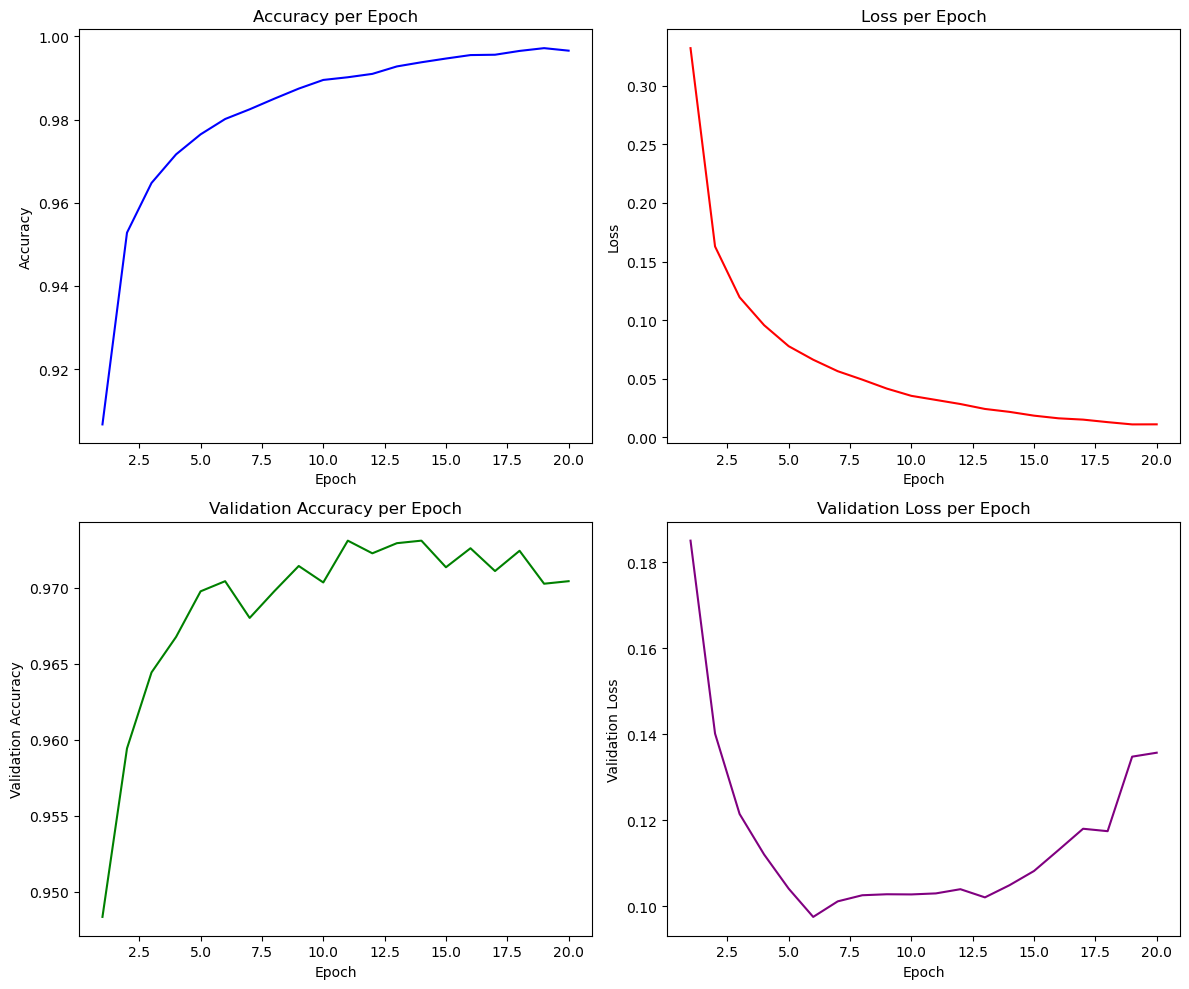

In [26]:
plot_history(history_adam)